# Nuclear Envelope Prediction from Transmitted Light Images

Load CZI image into loader class that represents each channel as a numpy array.

In [1]:
import gen_util
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

fname = './test_images/20161209_C01_001.czi'
czi_loader = gen_util.CziLoader(fname)

Sweep the z axis, displaying transmitted light and nuclear channels.

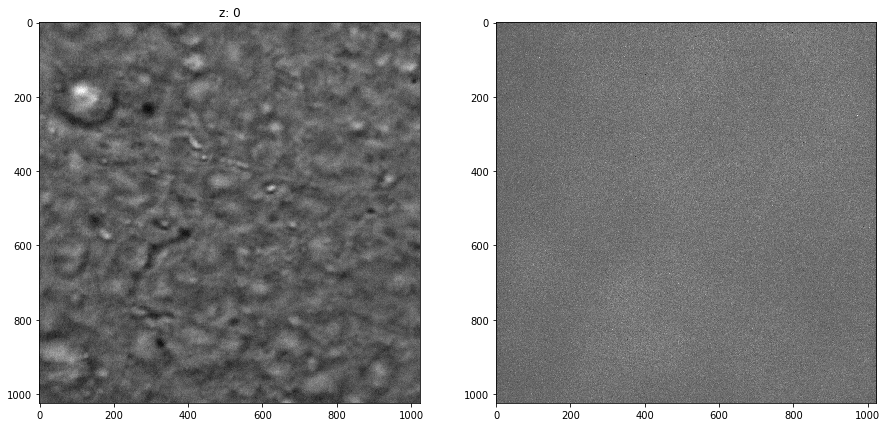

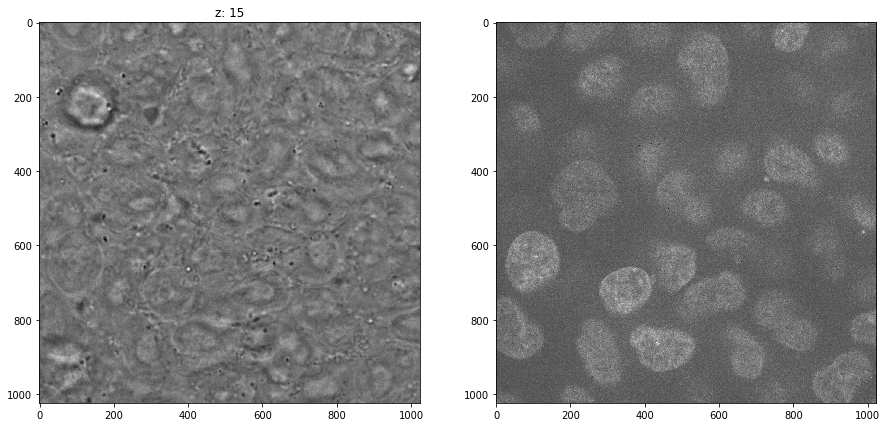

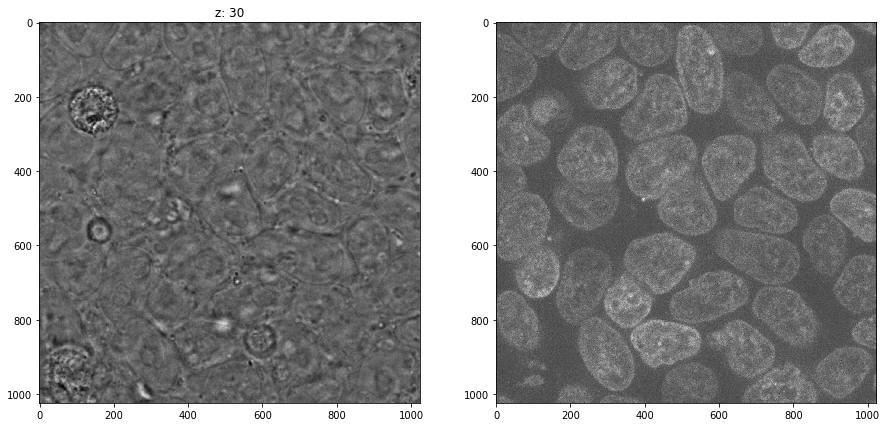

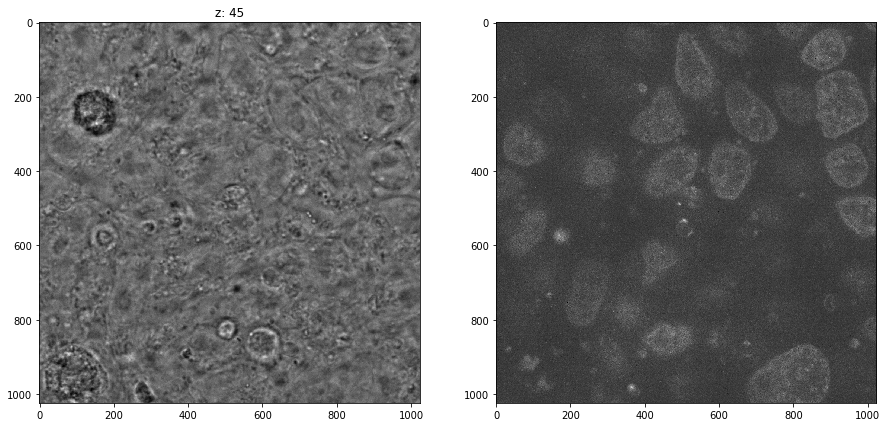

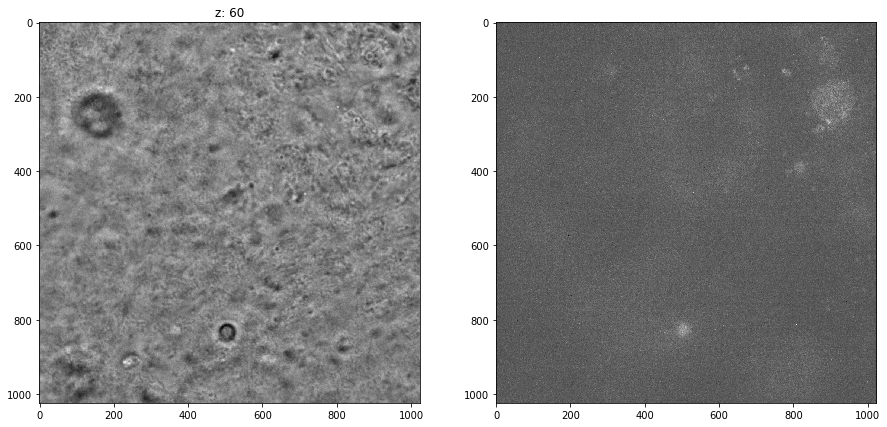

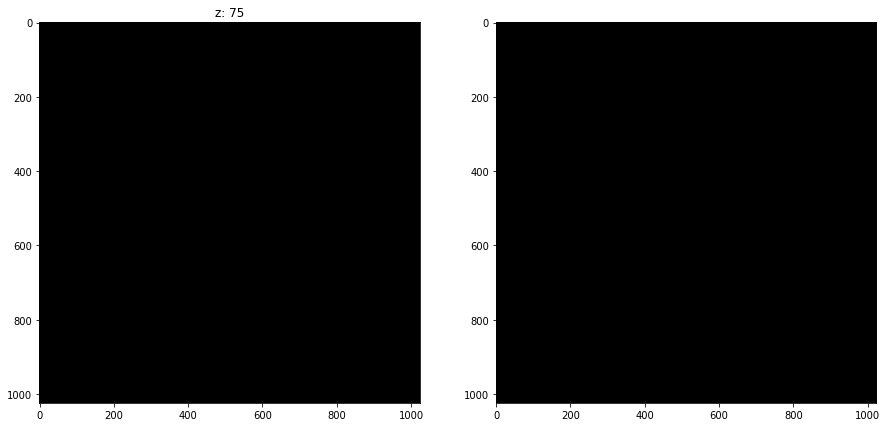

In [2]:
# channel = 0  # membrane
# channel = 2  # nuclear
# channel = 3  # light

vol_light = czi_loader.get_volume(3)
vol_nuc = czi_loader.get_volume(2)
for z in range(0, vol_light.shape[0], 15):
    img_light = vol_light[z, :, :]
    img_nuc = vol_nuc[z, :, :]
    
    figure = plt.figure(figsize=(15, 15))
    ax_0 = figure.add_subplot(1, 2, 1)
    ax_0.imshow(img_light, cmap='gray', norm=matplotlib.colors.Normalize())
    ax_0.set_title('z: {:d}'.format(z))
    ax_1 = figure.add_subplot(1, 2, 2)
    ax_1.imshow(img_nuc, cmap='gray')

    plt.show()

Extract n_cubes random NxNxN cubes from the transmitted light/nuclear volumes.

z: 0


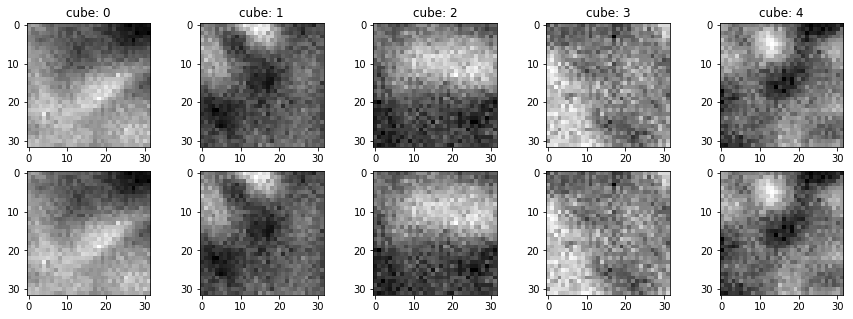

z: 3


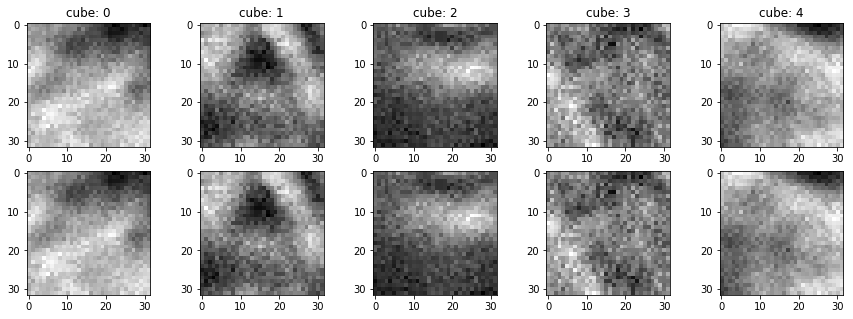

z: 6


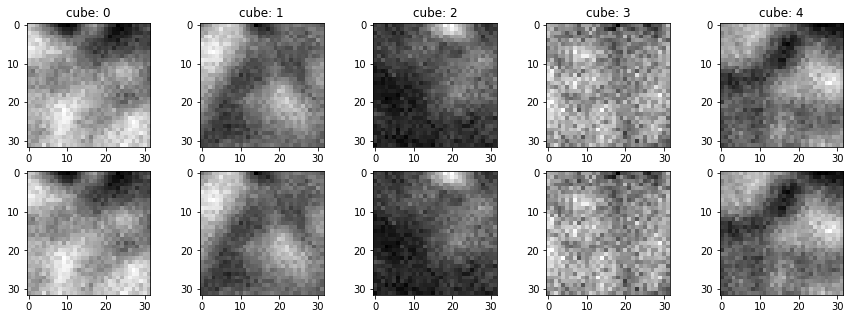

z: 9


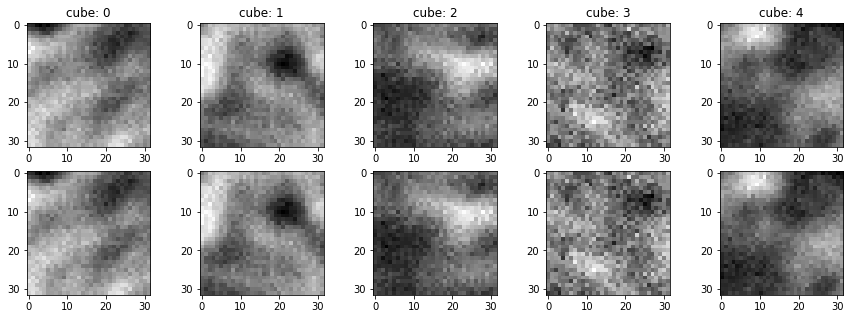

z: 12


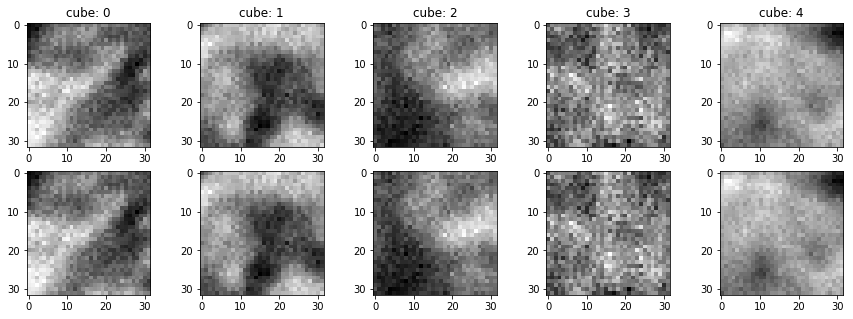

z: 16


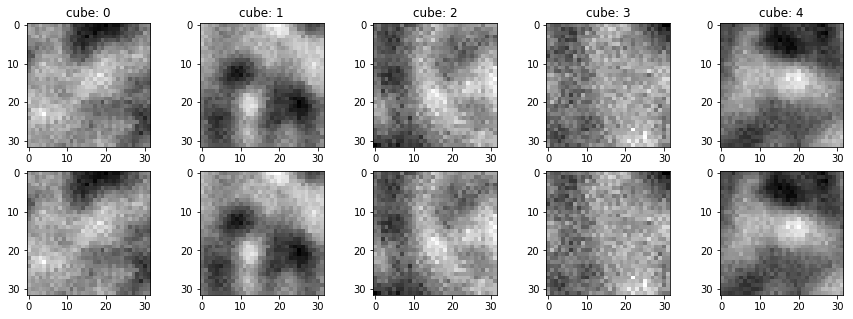

z: 19


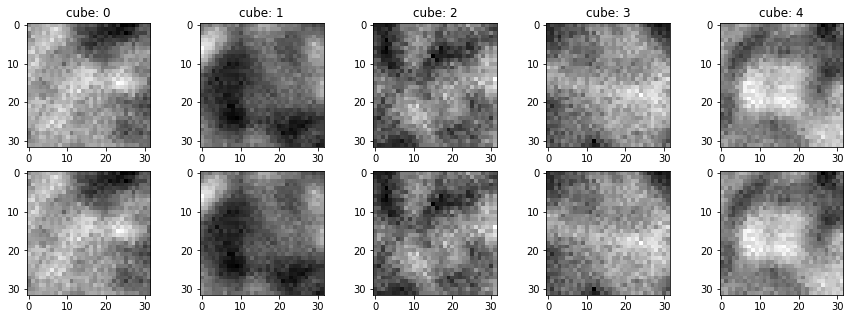

z: 22


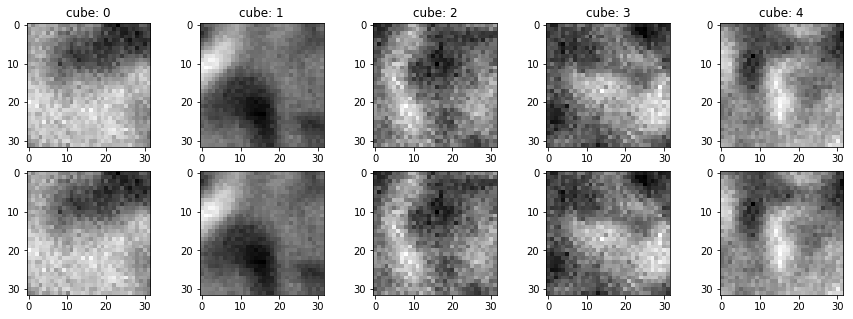

z: 25


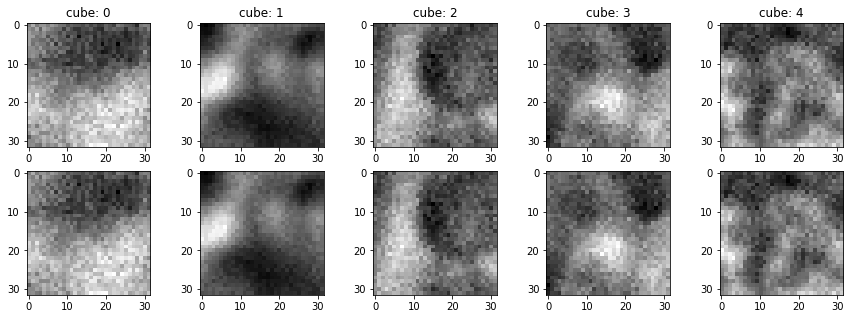

z: 28


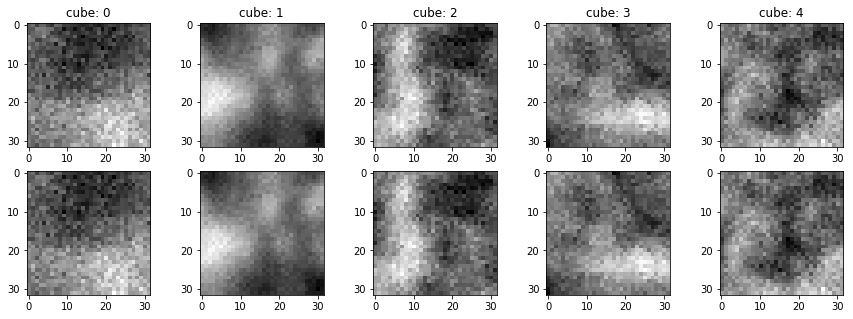

In [3]:
N = 32
n_cubes = 5
cube_dims = (N, N, N)
cubes = [gen_util.extract_chunk(vol_light, cube_dims, None) for i in range(n_cubes)]
# TODO: generate random point outside of extract_chunk, use for two channels
cubes_nuc = cubes  # temp
# cubes_nuc = [gen_util.extract_chunk(vol_nuc, cube_dims, None) for i in range(n_cubes)]
for z in np.linspace(0, N, num=10, endpoint=False, dtype=int):
    fig = plt.figure(figsize=(15, 5))
    print('z:', z)
    for i in range(n_cubes):
        cube_slice = cubes[i][z, :, :]
        cube_nuc_slice = cubes_nuc[i][z, :, :]
        ax = fig.add_subplot(2, n_cubes, i+1)
        ax.set_title('cube: ' + str(i))
        ax.imshow(cube_slice, cmap='gray')
        ax_n = fig.add_subplot(2, n_cubes, n_cubes + i+1)
        ax_n.imshow(cube_nuc_slice, cmap='gray')
    plt.show()